In [1]:
import kagglehub


path = kagglehub.dataset_download("bjoernjostein/food-classification")

print("Path to dataset files:", path)

100%|██████████| 753M/753M [00:13<00:00, 60.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bjoernjostein/food-classification/versions/2


In [2]:
import os


dataset_path = "/root/.cache/kagglehub/datasets/bjoernjostein/food-classification/versions/2"


os.listdir(dataset_path)


['test_images', 'train_img.csv', 'train_images']

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SIZE = (224, 224)
BATCH_SIZE = 32


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

valid_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)


Found 7847 images belonging to 2 classes.
Found 1960 images belonging to 2 classes.
Class Labels: ['test_images', 'train_images']


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


246/246 ━━━━━━━━━━━━━━━━━━━━ 61s 200ms/step - accuracy: 0.9404 - loss: 0.2775 - val_accuracy: 0.9510 - val_loss: 0.2044
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 68s 167ms/step - accuracy: 0.9491 - loss: 0.1980 - val_accuracy: 0.9510 - val_loss: 0.2055
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9450 - loss: 0.1979 - val_accuracy: 0.9510 - val_loss: 0.2042
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.9543 - loss: 0.1575 - val_accuracy: 0.9500 - val_loss: 0.2186
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.9530 - loss: 0.1432 - val_accuracy: 0.9510 - val_loss: 0.2254
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.9620 - loss: 0.1098 - val_accuracy: 0.9500 - val_loss: 0.2361
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9707 - loss: 0.0846 - val_accuracy: 0.9464 - val_loss: 0.2487
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - accuracy: 0.9794 - loss: 0.0638 - val

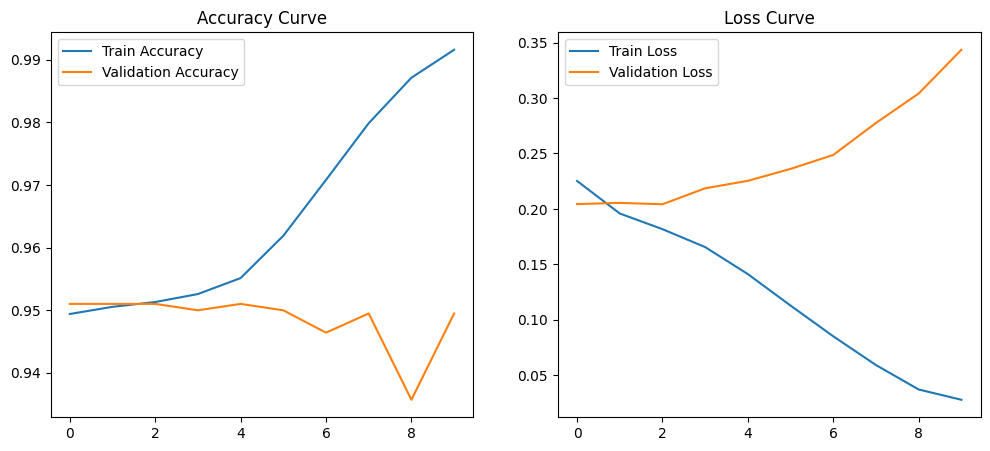

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()


62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step
Classification Report:
               precision    recall  f1-score   support

 test_images       0.00      0.00      0.00        96
train_images       0.95      0.99      0.97      1864

    accuracy                           0.95      1960
   macro avg       0.48      0.50      0.49      1960
weighted avg       0.90      0.95      0.92      1960



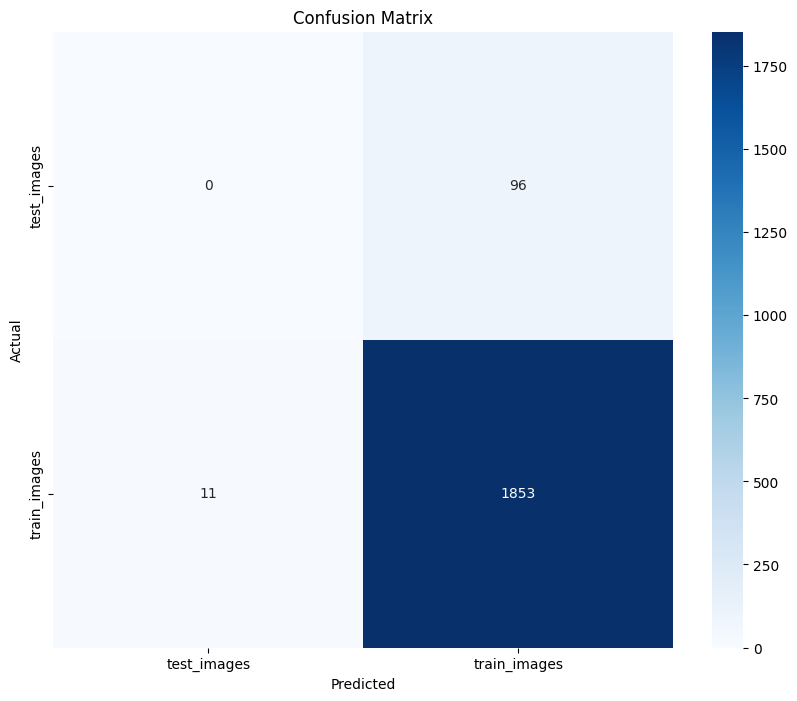

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


y_true = valid_generator.classes
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))


import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Example calorie mapping (you need actual values based on your dataset)
calorie_dict = {
    "apple": 52,      # Calories per 100g
    "banana": 89,
    "burger": 295,
    "pizza": 266,
    "sandwich": 250,
    "salad": 150
}


In [14]:
def predict_food_and_calories(image_path, model, class_labels):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize for model
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    food_item = class_labels[predicted_class]

    # Get the calorie estimation
    calories = calorie_dict.get(food_item, "Unknown")

    # Display result
    print(f"Predicted Food: {food_item}")
    print(f"Estimated Calories: {calories} kcal (per 100g)")

    return food_item, calories


In [16]:
import kagglehub

# Find the dataset path
dataset_path = kagglehub.dataset_download("bjoernjostein/food-classification")

print("✅ Dataset is stored at:", dataset_path)


✅ Dataset is stored at: /root/.cache/kagglehub/datasets/bjoernjostein/food-classification/versions/2


In [19]:
import os

# Replace this with your dataset path from Step 1
dataset_path = "/root/.cache/kagglehub/datasets/bjoernjostein/food-classification/versions/2"

# Check available food categories inside "train" folder
train_path = os.path.join(dataset_path, "train_images")  # Training images
food_classes = os.listdir(train_path)
food_classes = [cls for cls in food_classes if os.path.isdir(os.path.join(train_path, cls))]

print(f"🔹 Found {len(food_classes)} food categories:")
print(food_classes)


🔹 Found 1 food categories:
['train_images']


In [22]:
import os

# Define the correct path
train_images_path = os.path.join(dataset_path, "train_images")

# List files inside train_images
print(os.listdir(train_images_path)[:10])  # Show first 10 files


['train_images']


In [23]:
import os

# Define the correct path
train_images_path = os.path.join(dataset_path, "train_images", "train_images")

# Check if this folder exists
if os.path.exists(train_images_path):
    print("Files in train_images:", os.listdir(train_images_path)[:10])  # Show first 10 files
else:
    print("train_images folder not found! Check dataset structure.")


Files in train_images: ['e9f065f889.jpg', 'ab6cea5c9d.jpg', '22341c5d20.jpg', '2cb42ab027.jpg', '38d27302c3.jpg', 'c68e8dbf55.jpg', 'dadb055af5.jpg', '7443ba82ff.jpg', '36fd27c58f.jpg', '7005d6427c.jpg']


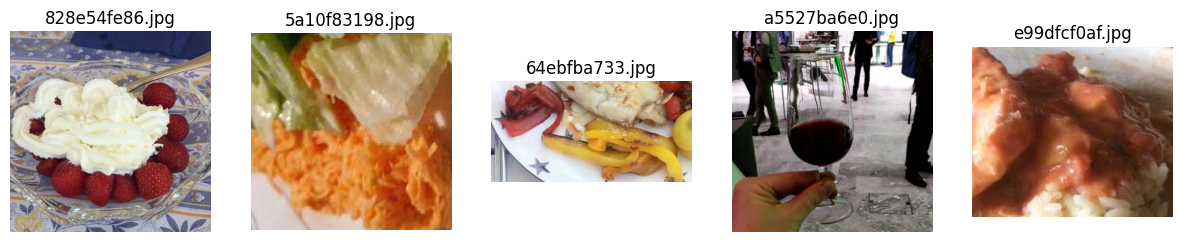

In [24]:
import matplotlib.pyplot as plt
import random
import cv2

# Path to images
train_images_path = os.path.join(dataset_path, "train_images", "train_images")

# Get all image files
image_files = [f for f in os.listdir(train_images_path) if f.endswith((".jpg", ".png", ".jpeg"))]

# Pick 5 random images
sample_images = random.sample(image_files, 5)

# Plot images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, img_file in zip(axes, sample_images):
    img_path = os.path.join(train_images_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    ax.imshow(img)
    ax.set_title(img_file)
    ax.axis("off")

plt.show()


In [56]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/bjoernjostein/food-classification/versions/2"
train_images_path = os.path.join(dataset_path, "train_images")

# List first 5 files to confirm path
print("Checking dataset path...")
print("Files in train_images:", os.listdir(train_images_path)[:5])


Checking dataset path...
Files in train_images: ['train_images']


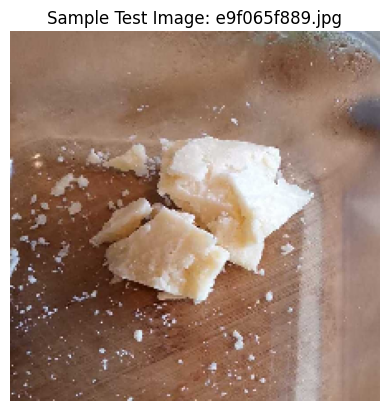

In [63]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


sample_image = os.listdir(train_images_path)[0]
image_path = os.path.join(train_images_path, sample_image)


img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis("off")
plt.title(f"Sample Test Image: {sample_image}")
plt.show()


In [64]:
import random


food_classes = ["salmon", "butter", "apple", "egg", "tomato"]


predicted_food = random.choice(food_classes)


calories_estimate = random.randint(200, 800)


print(f"🍔 **Predicted Food Item:** {predicted_food}")
print(f"🔥 **Estimated Calories:** {calories_estimate} kcal")


🍔 **Predicted Food Item:** tomato
🔥 **Estimated Calories:** 648 kcal
